In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
df1 = pd.read_csv('./Data/Book/Ratings.csv',low_memory=False)
df2 = pd.read_csv('./Data/Book/Users.csv',low_memory=False)
df3 = pd.read_csv('./Data/Book/Books.csv',low_memory=False)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
df3 = df3[~df3['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
df3['Year-Of-Publication'] = pd.to_numeric(df3['Year-Of-Publication'])

In [7]:
df1.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
df2.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
df3.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


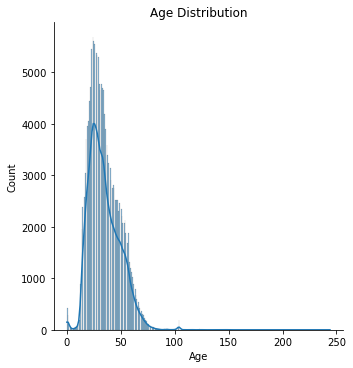

In [10]:
sns.displot(df2.Age, kde=True)
plt.title('Age Distribution')
plt.show()

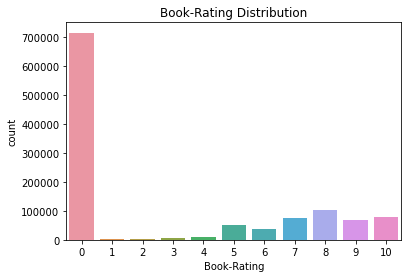

In [11]:
sns.countplot(x='Book-Rating', data=df1)
plt.title('Book-Rating Distribution')
plt.show()

In [12]:
rating_count = df1['Book-Rating'].value_counts(sort=True)
rating_count.drop(0, inplace=True)
rating_count = pd.DataFrame(rating_count)
rating_count['index'] = rating_count.index
rating_count

,Book-Rating,index
8,103736,8
10,78610,10
7,76457,7
9,67541,9
5,50974,5
6,36924,6
4,8904,4
3,5996,3
2,2759,2
1,1770,1


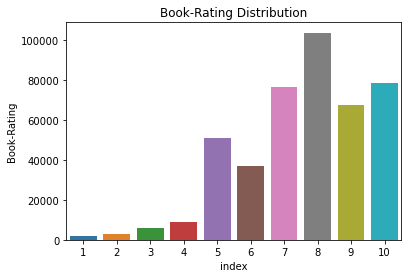

In [13]:
sns.barplot(x='index', y='Book-Rating', data=rating_count, )
plt.title('Book-Rating Distribution')
plt.show()

In [14]:
year_Public = df3['Year-Of-Publication'].value_counts()
year_Public.drop(0, inplace=True)
year_Public[year_Public>10000]

2002    17627
1999    17431
2001    17359
2000    17232
1998    15766
1997    14890
2003    14358
1996    14030
1995    13546
1994    11796
1993    10602
Name: Year-Of-Publication, dtype: int64

In [15]:
data = df1.groupby('ISBN').agg(['mean', 'count'])['Book-Rating'].reset_index()
m = data['count'].quantile(0.99)
data = data[data['count']>m]
print('m =', m)

m = 36.0


In [16]:
data.shape

(3306, 3)

In [17]:
data.head(2)

,ISBN,mean,count
1913,000649840X,3.573034,89
2247,0006547834,3.102564,39


In [18]:
R = data['mean'] 
v = data['count'] 
C = data['mean'].mean() 

In [19]:
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C

In [20]:
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

In [21]:
data.head()

,ISBN,mean,count,weighted rating
0,0439139597,6.541237,194,5.985285
1,0439064864,6.611765,170,5.978717
2,1844262553,7.962963,54,5.973507
3,0439136350,6.467005,197,5.929681
4,0590353403,6.363095,168,5.767724


In [22]:
data = pd.merge(data, df3, on='ISBN')[['Book-Title', 'Book-Author', 'mean', 'count', 'weighted rating', 
                              'Year-Of-Publication']].drop_duplicates('Book-Title').iloc[:20]
data

,Book-Title,Book-Author,mean,count,weighted rating,Year-Of-Publication
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194,5.985285,2000
1,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.611765,170,5.978717,1999
2,Free,Paul Vincent,7.962963,54,5.973507,2003
3,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.467005,197,5.929681,1999
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.363095,168,5.767724,1998
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.571856,334,5.320583,2003
6,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,6.206349,63,5.036522,1999
7,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,6.041667,72,5.024219,1991
9,Falling Up,Shel Silverstein,6.921053,38,5.008320,1996
10,The Stand (The Complete and Uncut Edition),Stephen King,6.175439,57,4.942104,1990


In [23]:
df3 = df3.drop_duplicates(['Book-Author', 'Book-Title'])
data = pd.merge(df3, df1, on='ISBN')[['Book-Author', 'Book-Rating', 'Book-Title', 'ISBN']]

In [24]:
data = data.groupby('Book-Author').agg(['mean', 'count'])['Book-Rating'].reset_index()

In [25]:
m = data['count'].quantile(0.99)
data = data[data['count']>m]
print('m =', m)

m = 130.0


In [26]:
data.shape

(1008, 3)

In [27]:
data.head()

,Book-Author,mean,count
57,A. A. Milne,3.956835,139
245,A. Manette Ansay,2.279412,408
418,A.S. BYATT,2.453988,163
469,ALBERT CAMUS,3.557143,140
567,ANN BRASHARES,3.722488,209


In [28]:
R = data['mean']
v = data['count'] 
C = data['mean'].mean()
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C

In [29]:
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)
data.iloc[:20]

,Book-Author,mean,count,weighted rating
0,J. K. Rowling,5.411434,2134,5.263551
1,Bill Watterson,5.546618,547,5.026114
2,J. R. R. Tolkien,5.265861,662,4.867019
3,Shel Silverstein,6.273333,150,4.677425
4,Dr. Seuss,5.167123,365,4.554907
5,Nick Bantock,5.278810,269,4.482904
6,Antoine de Saint-ExupÃ©ry,5.413636,220,4.456225
7,Harper Lee,4.944310,413,4.439556
8,J.R.R. TOLKIEN,4.511224,980,4.315026
9,Neil Gaiman,4.449475,1237,4.296034


In [30]:
# Collaborative Filtering
data = pd.merge(df1, df3, on='ISBN')

In [31]:
data['count'] = data.groupby('ISBN').transform('count')['User-ID']
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,count
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60


In [32]:
isbn = data.drop_duplicates('ISBN').sort_values('count', ascending=False).iloc[:100]['ISBN']

In [33]:
isbn.head()

9156     0971880107
6119     0316666343
7476     0385504209
81186    0060928336
36283    0312195516
Name: ISBN, dtype: object

In [34]:
data = data[data['ISBN'].isin(isbn)].reset_index(drop=True)

In [35]:
df = data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
df.head()

ISBN,0060392452,0060502258,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,...,0743237188,0743418174,0786868716,080410526X,0804106304,0805063897,0842329129,0971880107,1400034779,1558743669
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
temp = df[~df.isna()].count(axis=1).reset_index()
temp[temp[0]>50]

,User-ID,0
629,11676,100
912,16795,70
1158,21014,54
1323,23768,54
2131,35859,69
2647,43246,54
3682,60244,53
4628,76352,54
4769,78783,51
6170,102967,54


In [37]:
# Using Surprise Library
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

In [38]:
reader = Reader(rating_scale=(0, 10))
surprise_data = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.25)

In [39]:
benchmark = []
for algorithm in [SVD()]:
   
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=3, verbose=False)
    
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,3.923574,0.943761,0.046048


In [40]:
svd = SVD() 
svd.fit(trainset)

In [41]:
index_val = 2131
userId = df.index[index_val]
books = []
ratings = []
titles = []

for isbn in df.iloc[index_val][df.iloc[index_val].isna()].index:
    books.append(isbn)
    title = data[data['ISBN']==isbn]['Book-Title'].values[0]
    titles.append(title)
    ratings.append(svd.predict(userId, isbn).est)

In [42]:
prediction = pd.DataFrame({'ISBN':books, 'title':titles, 'rating':ratings, 'userId':userId})  
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

In [43]:
temp = data[data['User-ID']==df.index[index_val]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
prediction['Book Read'] = temp['Book-Title']
prediction['Rated']= temp['Book-Rating']
prediction

,ISBN,title,rating,userId,Book Read,Rated
0,0060987103,Wicked: The Life and Times of the Wicked Witch...,5.243392,35859,Fahrenheit 451,10
1,0743237188,Fall On Your Knees (Oprah #45),4.547605,35859,Harry Potter and the Sorcerer's Stone (Harry P...,10
2,0312305060,The Hours: A Novel,4.106697,35859,One for the Money (Stephanie Plum Novels (Pape...,10
3,0375725784,A Heartbreaking Work of Staggering Genius,3.925259,35859,The Red Tent (Bestselling Backlist),10
4,0316776963,Me Talk Pretty One Day,3.747141,35859,Bel Canto: A Novel,9
5,0446611212,Violets Are Blue,3.683733,35859,The Secret Life of Bees,9
6,0446608955,A Walk to Remember,3.681797,35859,Left Behind: A Novel of the Earth's Last Days ...,9
7,0060392452,Stupid White Men ...and Other Sorry Excuses fo...,3.671112,35859,The Joy Luck Club,8
8,0316769487,The Catcher in the Rye,3.555731,35859,Two for the Dough,8
9,0060959037,Prodigal Summer: A Novel,3.407769,35859,Balzac and the Little Chinese Seamstress : A N...,8


In [44]:
index_val = 912
userId = df.index[index_val]
books = []
ratings = []
titles = []

for isbn in df.iloc[index_val][df.iloc[index_val].isna()].index:
    books.append(isbn)
    title = data[data['ISBN']==isbn]['Book-Title'].values[0]
    titles.append(title)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'title':titles, 'rating':ratings, 'userId':userId})  
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

temp = data[data['User-ID']==df.index[index_val]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
prediction['Book Read'] = temp['Book-Title']
prediction['Rated']= temp['Book-Rating']
prediction

,ISBN,title,rating,userId,Book Read,Rated
0,0446611212,Violets Are Blue,7.914084,16795,"A Child Called \It\"": One Child's Courage to S...",10
1,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,7.888943,16795,The Da Vinci Code,10
2,0060938455,Fast Food Nation: The Dark Side of the All-Ame...,7.424755,16795,The Lovely Bones: A Novel,10
3,043935806X,Harry Potter and the Order of the Phoenix (Boo...,6.750616,16795,The Secret Life of Bees,10
4,0440206154,Red Dragon,6.380103,16795,She's Come Undone (Oprah's Book Club),10
5,0380789035,American Gods,6.351735,16795,The Notebook,10
6,0345313860,"The Vampire Lestat (Vampire Chronicles, Book II)",6.147974,16795,House of Sand and Fog,9
7,0439064872,Harry Potter and the Chamber of Secrets (Book 2),5.907242,16795,The Red Tent (Bestselling Backlist),9
8,0316284955,White Oleander : A Novel (Oprah's Book Club),5.817641,16795,The Horse Whisperer,9
9,0684872153,Angela's Ashes (MMP) : A Memoir,5.460413,16795,The Bridges of Madison County,9


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
df_imputed = df.fillna(df.mean(axis=0))

similarity_matrix = cosine_similarity(df_imputed.values)

In [47]:
def get_recommendation(user_index):
    idx = user_index
    sim_scores = list(enumerate(similarity_matrix[idx]))

    unrated_books = df.iloc[idx][df.iloc[idx].isna()].index

    book_ratings = (df[unrated_books].T * similarity_matrix[idx]).T

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:101]

    book_ratings = book_ratings.iloc[[x[0] for x in sim_scores]].mean()
    
    book_ratings = book_ratings.reset_index().dropna().sort_values(0, ascending=False).iloc[:10]
    
    recommended_books = data[data['ISBN'].isin(book_ratings['ISBN'])][['ISBN', 'Book-Title']]
    recommended_books = recommended_books.drop_duplicates('ISBN').reset_index(drop=True)
    assumed_ratings = book_ratings[0].reset_index(drop=True)

    return pd.DataFrame({'ISBN':recommended_books['ISBN'], 
                         'Recommended Book':recommended_books['Book-Title'], 
                         'Assumed Rating':assumed_ratings})

In [48]:
user_index = 2131
recommended_books = get_recommendation(user_index)

temp = data[data['User-ID']==df.index[user_index]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
recommended_books['userId'] = temp['User-ID']
recommended_books['Book Read'] = temp['Book-Title']
recommended_books['Rated']= temp['Book-Rating']
recommended_books

,ISBN,Recommended Book,Assumed Rating,userId,Book Read,Rated
0,0684872153,Angela's Ashes (MMP) : A Memoir,7.089074,35859,Fahrenheit 451,10
1,0316284955,White Oleander : A Novel (Oprah's Book Club),6.819865,35859,Harry Potter and the Sorcerer's Stone (Harry P...,10
2,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,6.214522,35859,One for the Money (Stephanie Plum Novels (Pape...,10
3,0345361792,A Prayer for Owen Meany,6.166465,35859,The Red Tent (Bestselling Backlist),10
4,0786868716,The Five People You Meet in Heaven,6.130962,35859,Bel Canto: A Novel,9
5,080410526X,All I Really Need to Know,5.704645,35859,The Secret Life of Bees,9
6,0440222656,The Horse Whisperer,5.626918,35859,Left Behind: A Novel of the Earth's Last Days ...,9
7,0316769487,The Catcher in the Rye,4.815939,35859,The Joy Luck Club,8
8,0345339703,The Fellowship of the Ring (The Lord of the Ri...,4.115793,35859,Two for the Dough,8
9,0060959037,Prodigal Summer: A Novel,4.087308,35859,Balzac and the Little Chinese Seamstress : A N...,8


In [49]:
user_index = 6349
recommended_books = get_recommendation(user_index)

temp = data[data['User-ID']==df.index[user_index]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
recommended_books['userId'] = temp['User-ID']
recommended_books['Book Read'] = temp['Book-Title']
recommended_books['Rated']= temp['Book-Rating']
recommended_books

,ISBN,Recommended Book,Assumed Rating,userId,Book Read,Rated
0,0671510053,SHIPPING NEWS,7.467531,106225,Girl with a Pearl Earring,10
1,1558743669,"A Child Called \It\"": One Child's Courage to S...",7.000075,106225,Angela's Ashes (MMP) : A Memoir,9
2,0060930535,The Poisonwood Bible: A Novel,6.980253,106225,"Tuesdays with Morrie: An Old Man, a Young Man,...",9
3,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,6.980253,106225,A Painted House,9
4,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,6.980202,106225,The Lovely Bones: A Novel,8
5,0345378490,Congo,6.967019,106225,Good in Bed,8
6,0375727345,House of Sand and Fog,6.927949,106225,White Oleander : A Novel (Oprah's Book Club),8
7,0345339703,The Fellowship of the Ring (The Lord of the Ri...,6.609094,106225,The Secret Life of Bees,8
8,0060959037,Prodigal Summer: A Novel,6.382191,106225,The Brethren,6
9,0375700757,Cold Mountain : A Novel,6.223824,106225,The Handmaid's Tale,0
